In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
model_folders = [
    '/home/ncarrara/physics/corenet_runs_v1/corenet_v3_100_epoch_decoder_dropout_03_25_50_25_2025.1.20.10.8.5/'
]
model_files = [
    'evaluated_corenet_v1_2025.1.28.10.41.51.npz'
]
model_names = [
    'shallow_v1'
]

In [89]:
def make_weak_space_histogram(
    weak_values,
    validities,
):
    pass

def make_weak_space_conditional_histogram(
    weak_values,
    validities,
):
    pass

def compute_efficiencies(
    weak_values,
    gut_test_constraints,
    gut_test_output_constraints,
    bins=10,
):
    hist, x_edges, y_edges = np.histogram2d(weak_values[:, 0], weak_values[:, 1], bins=[bins, bins])
    x_bin_indices = np.digitize(weak_values[:, 0], x_edges) - 1
    y_bin_indices = np.digitize(weak_values[:, 1], y_edges) - 1
    bin_entries = np.array(list(zip(x_bin_indices, y_bin_indices)))

    """Create empty histogram scalars for validities"""
    gut_test_m_H = np.zeros(hist.shape)
    gut_test_dm = np.zeros(hist.shape)
    gut_test_double = np.zeros(hist.shape)
    gut_test_triple = np.zeros(hist.shape)
    gut_test_output_m_H = np.zeros(hist.shape)
    gut_test_output_dm = np.zeros(hist.shape)
    gut_test_output_double = np.zeros(hist.shape)
    gut_test_output_triple = np.zeros(hist.shape)
    m_H_efficiency = np.zeros(hist.shape)
    dm_efficiency = np.zeros(hist.shape)
    double_efficiency = np.zeros(hist.shape)
    triple_efficiency = np.zeros(hist.shape)

    for i, x_edge in enumerate(x_bin_indices):
        if i >= bins:
            continue
        for j, y_edge in enumerate(y_bin_indices):
            if j >= bins:
                continue
            bin_ents = (bin_entries[:, 0] == i) & (bin_entries[:, 1] == j)
            gut_test_bin_constraints = gut_test_constraints[bin_ents]
            gut_test_output_bin_constraints = gut_test_output_constraints[bin_ents]
            """Make valid masks"""
            gut_test_m_H_mask = (gut_test_bin_constraints[:, 0] == 1.0)
            gut_test_dm_mask = (gut_test_bin_constraints[:, 1] == 1.0)
            gut_test_double_mask = (gut_test_m_H_mask & gut_test_dm_mask)
            gut_test_triple_mask = (gut_test_double_mask) & (gut_test_bin_constraints[:, 2] == 1.0)
            
            gut_test_output_m_H_mask = (gut_test_output_bin_constraints[:, 0] == 1.0)
            gut_test_output_dm_mask = (gut_test_output_bin_constraints[:, 1] == 1.0)
            gut_test_output_double_mask = (gut_test_output_m_H_mask & gut_test_output_dm_mask)
            gut_test_output_triple_mask = (gut_test_output_double_mask) & (gut_test_output_bin_constraints[:, 2] == 1.0)
            
            gut_test_m_H[i][j] = sum(gut_test_m_H_mask)
            gut_test_dm[i][j] = sum(gut_test_dm_mask)
            gut_test_double[i][j] = sum(gut_test_double_mask)
            gut_test_triple[i][j] = sum(gut_test_triple_mask)
            
            gut_test_output_m_H[i][j] = sum(gut_test_output_m_H_mask)
            gut_test_output_dm[i][j] = sum(gut_test_output_dm_mask)
            gut_test_output_double[i][j] = sum(gut_test_output_double_mask)
            gut_test_output_triple[i][j] = sum(gut_test_output_triple_mask)
            
            m_H_efficiency[i][j] = sum(~gut_test_m_H_mask & gut_test_output_m_H_mask)
            dm_efficiency[i][j] = sum(~gut_test_dm_mask & gut_test_output_dm_mask)
            double_efficiency[i][j] = sum(~gut_test_double_mask & gut_test_output_double_mask)
            triple_efficiency[i][j] = sum(~gut_test_triple_mask & gut_test_output_triple_mask)
    return {
        'hist': hist,
        'x_edges': x_edges,
        'y_edges': y_edges,
        'bin_entries': bin_entries,
        'gut_test_m_H': gut_test_m_H,
        'gut_test_dm': gut_test_dm,
        'gut_test_double': gut_test_double,
        'gut_test_triple': gut_test_triple,
        'gut_test_output_m_H': gut_test_output_m_H,
        'gut_test_output_dm': gut_test_output_dm,
        'gut_test_output_double': gut_test_output_double,
        'gut_test_output_triple': gut_test_output_triple,
        'm_H_efficiency': m_H_efficiency,
        'dm_efficiency': dm_efficiency,
        'double_efficiency': double_efficiency,
        'triple_efficiency': triple_efficiency,
    }

def plot_m_H_error(
    weak_test,
    weak_output
):
    fig, axs = plt.subplots()
    non_zero = (weak_output[:, 0] != -1)
    axs.scatter(weak_test[:, 0][non_zero], weak_output[:, 0][non_zero])
    plt.show()
    

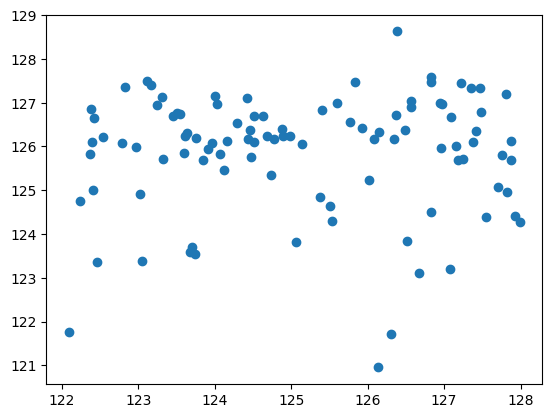

{'hist': array([[1007.,  959., 1055., 1057.,  987., 1034.,  936., 1030., 1012.,
         930.],
       [1019., 1003.,  986.,  986.,  973., 1070.,  991.,  975.,  953.,
        1040.],
       [1049.,  986.,  978., 1003., 1041., 1005., 1010., 1025.,  991.,
         992.],
       [1048.,  994.,  977., 1017., 1045.,  964., 1043.,  955.,  962.,
        1063.],
       [1073., 1020., 1011.,  978., 1003., 1034., 1027., 1042.,  984.,
        1024.],
       [ 960.,  962.,  979., 1002.,  962.,  971.,  994.,  945., 1005.,
         976.],
       [ 991.,  940., 1029.,  982., 1002.,  963., 1051.,  988., 1013.,
        1012.],
       [ 988., 1042., 1004.,  980., 1015., 1006., 1006.,  959., 1010.,
         946.],
       [1001., 1013., 1027.,  961.,  986.,  978.,  992.,  994.,  986.,
        1037.],
       [1017.,  967., 1047.,  967.,  967.,  993., 1049., 1022.,  987.,
         979.]]), 'x_edges': array([122.09016 , 122.69013 , 123.290115, 123.89009 , 124.49007 ,
       125.09004 , 125.690025, 126.29    

In [90]:
f = np.load(model_folders[0] + model_files[0])
weak_test = f['weak_test']
weak_test[:, 0] = weak_test[:, 0] * (128.09 - 122.09) + 122.09
weak_test[:, 1] = weak_test[:, 1] * (0.14 - 0.08) + 0.08
gut_test_constraints = f['gut_test_constraints']
gut_test_output_constraints = f['gut_test_output_constraints']
gut_test_output_susy_weak_params = f['gut_test_output_susy_weak_params']
gut_test_output_micromegas_params = f['gut_test_output_micromegas_params']
weak_test_output = np.array([
    [gut_test_output_susy_weak_params[ii, 1], float(gut_test_output_micromegas_params[ii, 0])]
    for ii in range(len(gut_test_output_susy_weak_params))
])
result = compute_efficiencies(weak_test, gut_test_constraints, gut_test_output_constraints)


plot_m_H_error(
    weak_test,
    weak_test_output
)

print(result)